In [62]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pyke
from pyke import KeplerTargetPixelFile
from glob import glob
import everest
import os
import fnmatch
from ipywidgets import interact
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [87]:
def K2tran(pixelfile,save):
    hdu = fits.open(pixelfile)
    dat = hdu[1].data
    datacube = dat["FLUX"]
    time = dat["TIME"]


    n_steps = 12
    std_vec = np.zeros(n_steps)
    for i in range(n_steps):
        std_vec[i] = np.nanstd(datacube[i:-n_steps+i:n_steps,:,:] - datacube[i+n_steps*80,:,:])
    Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
    # Make a mask of the target object, using the reference frame 
    Mask = datacube[Framemin,:,:]/np.nanstd(datacube[Framemin,:,:])
    Mask[Mask>2] = np.nan
    Mask[Mask<2] = 1

    LC = np.nansum(datacube*Mask, axis=(1,2))

    lc = LC/np.nanmedian(LC)
    slc = LC[Framemin::n_steps]/np.nanmedian(LC[Framemin::n_steps])
    stime = time[Framemin::n_steps]

    med = np.nanmedian(lc)
    std = np.nanstd(lc)

    cutlc = [x for x in lc if (x >med-2*std and x<med+2*std)] #Cutting out points that are greater than 2 std

    scutlc = cutlc[Framemin::n_steps]
    excess = cutlc[Framemin::n_steps]>(np.nanmedian(cutlc)+2*np.nanstd(cutlc))
    if len(excess)>0:
        i = 0
        line = 0
        Index=[]
        while line < 4 and i<len(excess):
            Index = []
            while (excess[i] == True and i+1<len(excess)):
                line = line +1
                Index.append(i)
                i=i+1
            i=i+1
        print(Index)
        if len(Index)<4:
            Index = []
        if len(Index)>0:
            plt.figure()
            plt.plot(scutlc,'.')
            plt.plot(Index,np.array(scutlc)[Index],'o',alpha=0.3, markersize = 10)
            plt.title(pixelfile.split('/')[-1].split('-')[0]+' Number of pixels:'+str(np.count_nonzero(~np.isnan(Mask))))
            plt.xlabel('Time (frames)')
            plt.ylabel('Normalised flux')
            plt.tight_layout()
            plt.savefig(save+pixelfile.split('/')[-1].split('-')[0]+'.pdf');
    else:
        excess=0
        Index=[] 
    return lc, time, excess, Index, Framemin  

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less


[48, 49]
[186]
[20]
[202]
[42, 43, 44, 45]
[27]
[147, 148]
[205]
[159]
[208]
[50, 51]
[153]
[156]
[168]
[43, 44, 45, 46]
[212]
[109]
[267, 268]
[50, 51]
[43, 44, 45]
[42, 43, 44]
[58]
[78]
[185]
[182]
[26, 27]
[253]
[177, 178, 179, 180]
[51, 52]
[53]
[124]
[168, 169]
[167, 168]
[53]
[159, 160]
[43, 44, 45]
[159, 160]
[159, 160]
[43, 44]
[153]
[53]
[172]
[43, 44, 45]
[54]
[45]
[54]
[168, 169, 170, 171]
[115]
[165]
[169, 170]
[54]
[165, 166]
[49]
[165, 166]
[159, 160]
[169, 170]
[47]
[153, 154]
[24, 25]
[244]
[]
[252]
[252]
[]
[252]
[269, 270]
[]
[]
[230]
[]
[229, 230]
[261, 262, 263]
[199]
[247]
[212, 213]
[275, 276]
[60]
[15]
[77]
[107]
[183]
[207]
[264]
[]
[160]
[234]
[]
[241]
[260]
[251]
[159, 160]
[46]
[42, 43, 44, 45]
[180]
[55]
[42]
[34]
[122]
[167]
[161, 162]
[42, 43, 44]
[159, 160]
[167]
[259, 260]
[252, 253, 254, 255]
[186]
[143]
[227]
[143, 144]
[]
[121]
[]
[188]
[]
[290]
[164]
[274]
[238, 239, 240]
[168]
[222]
[286]
[]
[51]
[297]
[32]
[161]
[36]
[285, 286]
[]
[272, 273, 274]


/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in true_divide
/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/ryanr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/ryanr/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/ryanr/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:990: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[266]
[158, 159]
[167]
[164]
[190]
[179, 180]


/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in true_divide


[191, 192]
[169]
[88]
[260]
[]
[266, 267, 268, 269, 270]
[270]
[199]
[194, 195]
[276, 277]
[]
[229, 230]
[51]
[183]
[]
[167]
[178]
[181]
[118]
[274]
[245, 246]
[209, 210]
[260]
[193]
[159]
[192]
[184]
[162]
[41, 42]
[]
[28]
[]
[42]
[118]
[]
[161]
[166, 167]
[290, 291, 292]
[181]
[237]
[164]
[180, 181]
[206, 207]
[211]
[142]
[300]
[239]
[285, 286]
[122]
[184]
[22]
[216]
[40]
[254]
[268]
[175]
[]
[29]
[263]
[183]
[149, 150, 151, 152]
[]
[242, 243]
[216]
[164]
[158]
[16]
[212]
[233]
[265]
[45]
[292]
[]
[]
[]
[]
[170, 171]
[293]
[221, 222]
[250]
[193]
[204]
[253]
[281]
[199]
[196]
[]
[223]
[300]
[194, 195]
[]
[138]
[219]
[]
[284]
[251]
[195]
[229]
[188]
[49]
[23]
[149, 150]
[267, 268, 269]
[]
[277]
[180, 181]
[98]
[284, 285, 286]
[80]
[293]
[201]
[282, 283, 284]
[159, 160]
[115]
[279]
[160]
[158]
[270]
[208]
[61]
[]
[263]
[248]
[48]
[253]
[]
[287]
[]
[250]
[251]
[]
[224]
[67]
[277]
[94]
[271]
[134]
[]
[212]
[37]
[160]
[290]
[]
[275, 276]
[158]
[123]
[64]
[228]
[280, 281, 282]
[208]
[251, 2

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in true_divide


[166, 167]
[110]
[184]
[163]
[169]
[]
[208]
[243]
[95]
[279]
[]
[176, 177, 178, 179]
[219]
[157, 158]
[]
[280, 281]
[108]
[147]
[]
[279, 280]
[]
[249]
[160]
[]
[]
[159, 160, 161]
[215]
[]
[]
[218]
[]
[210, 211, 212, 213]
[224]
[]
[46]
[174]
[]
[41]
[176, 177]
[]
[255]
[196]
[26]
[]
[34]
[38]
[53]
[154]
[223]
[]
[214]
[22, 23]
[]
[]
[293]
[173]
[85]
[178]
[200]
[]
[23, 24]
[188]
[38, 39, 40]
[190]
[]
[97]
[]
[120, 121]
[170, 171]
[157]
[191]
[170]
[273]
[275]
[183]
[221]
[223]
[283]
[156]
[273]
[94]
[59]
[272]
[]
[39, 40]
[]
[]
[]
[]
[189]
[]
[177]
[217]
[183]
[169, 170]
[251]
[171]
[]
[43]
[]
[237]
[169]
[151]
[235]
[215]
[117]
[123]
[161, 162, 163]
[]
[284]
[261]
[258]
[222, 223]
[]
[276]
[50]
[]
[165, 166]
[255, 256]
[]
[273, 274]
[17, 18]
[260]
[26]
[261]
[263]
[]
[159]
[262]
[257]
[275]
[]
[157]
[200]
[64]
[269]
[]
[]
[271]
[284]
[163, 164, 165]
[246, 247]
[81]
[113, 114]
[]
[224]
[121]
[240]
[278, 279]
[202]
[240, 241]
[249]
[242]
[90, 91, 92]
[246]
[83]
[135]
[129]
[195, 196, 197

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


[165, 166]
[22, 23]
[159, 160]
[44, 45, 46]
[168]
[40]
[43, 44, 45, 46]
[20]
[190]
[153, 154]
[172, 173]
[29]
[63]
[171]
[174]
[54]
[44]
[53]
[29]
[20]
[169, 170]
[166, 167]
[50, 51]
[175]
[47]
[184]
[50]
[174, 175, 176, 177]
[47]
[168, 169]
[165, 166]
[174]
[29]
[168, 169, 170, 171]
[56]
[168, 169]
[26, 27]
[112]
[56]
[168, 169]
[168, 169, 170, 171]
[156]
[53]
[49]
[186]
[165, 166]
[29]
[43, 44, 45, 46]
[45]
[23]
[25]
[49, 50]
[165, 166]
[171]
[189]
[54]
[45]
[181]
[50, 51]
[214]
[176]
[53]
[43, 44, 45]
[58]
[44, 45]
[43, 44, 45]
[165, 166]
[215, 216]
[28]
[49]
[128]
[49, 50]
[173]
[51]
[162, 163]
[172]
[20, 21]
[42, 43, 44]
[159, 160]
[35]
[37]
[159, 160]
[159, 160]
[57]
[162]
[167]
[168]
[52]
[44]
[168, 169]
[20]
[29]
[162]
[42]
[171, 172]
[156]
[165, 166]
[159, 160]
[20, 21]
[165, 166]
[56]
[165, 166]
[25]
[165, 166]
[180]
[159]
[24]
[170]
[159, 160]
[40]
[45]
[19, 20]
[56]
[56]
[217]
[20, 21]
[33]
[43, 44, 45, 46]


/Users/ryanr/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[43, 44, 45, 46]
[167]
[56]
[168]
[20, 21]
[161]
[40]
[31]
[44]
[165, 166]
[40]
[20]
[166, 167]
[53]
[32]
[168, 169]
[52]
[187]
[153, 154]
[53]
[41]
[30]
[182]
[165, 166]
[47]
[169, 170]
[20]
[181]
[153]
[159, 160]
[153, 154]
[176]
[]
[191]
[24]
[37]
[184]
[47]
[27]
[175]
[190]
[165, 166]
[153, 154]
[165, 166]
[177]
[20, 21]
[211]
[218]
[156]
[26, 27]
[156]
[156]
[42, 43, 44, 45]
[40]
[43, 44, 45]
[38]
[68]
[36]
[165, 166]
[168, 169]
[159, 160]
[28]
[166, 167]
[58]
[36]
[177]
[167]
[181]
[28]
[]
[51, 52]
[34]
[169]
[178]
[53]
[19, 20]
[53]
[177, 178, 179, 180]
[175]
[173]
[167]
[172]
[47]
[31]
[27]
[39]
[31]
[176]
[28]
[25]
[173]
[156]
[34]
[109]
[20]
[193, 194, 195]
[225]
[165, 166]
[178]
[167]
[43, 44]
[23]
[29]
[176]
[165, 166]
[174]
[31]
[20, 21]
[40]
[168, 169]
[22]
[50]
[159, 160]
[168]
[53]
[]
[27]
[157]
[165, 166]
[196, 197]
[18, 19]
[159, 160]
[45]
[51]
[157]
[165, 166]
[47]
[161, 162]
[159]
[169, 170, 171, 172]
[43, 44]
[27]
[112]
[168, 169]
[166, 167]
[33]
[163]
[]
[170, 171

[54]
[20, 21]
[162]
[153]
[172]
[241]
[174]
[19, 20, 21]
[170, 171]
[177, 178]
[171, 172]
[174]
[20]
[159, 160]
[152]
[25]
[204]
[44, 45]
[218]
[42, 43, 44, 45]
[20, 21]
[45, 46]
[200]
[75]
[20, 21]
[44]
[47]
[176]
[44]
[43, 44]
[51]
[177, 178, 179]
[56]
[178]
[58]
[33]
[169]
[20]
[54]
[40]
[44]
[40]
[43, 44, 45]
[40]
[41]
[20]
[165, 166]
[42]
[138]
[56]
[169]
[157, 158]
[182]
[161, 162]
[165, 166]
[53]
[42, 43, 44, 45]
[153]
[175]
[171]
[218]
[248, 249]
[29]
[47]
[54]
[173]
[166, 167]
[199]
[29]
[22]
[186]
[19, 20]
[50]
[291, 292, 293]
[46]
[167]
[24]
[42]
[171, 172]
[178]
[159, 160]
[153]
[20]
[19, 20]
[43]
[19, 20, 21]
[183]
[36]
[159, 160]
[156]
[169, 170]
[159, 160]
[26, 27]
[78]
[29]
[171]
[31]
[159, 160]
[182]
[180]
[168, 169]
[162, 163]
[152]
[49]
[175]
[58]
[48]
[58]
[168, 169]
[50]
[43, 44, 45, 46]
[168, 169]
[175]
[156]
[168]
[170, 171]
[30]
[88]
[169, 170]
[32]
[280]
[173]
[162]
[44]
[169, 170, 171]
[166, 167]
[50]
[40, 41]
[20, 21]
[168]
[156]
[173]
[30]
[40]
[162]
[43, 44

[158]
[159, 160]
[46]
[32]
[165, 166]
[156]
[56]
[169, 170]
[43]
[176]
[176]
[174]
[167]
[178]
[53]
[48, 49]
[20, 21]
[173]
[172]
[50]
[176]
[22, 23]
[124]
[167]
[43, 44, 45, 46]
[159, 160]
[156]
[290, 291]
[224]
[184]
[191]
[22, 23]
[60]
[43]
[178]
[29]
[79, 80]
[177, 178, 179, 180]
[178]
[49, 50]
[196]
[40]
[159, 160]
[168, 169]
[153, 154]
[51, 52]
[176]
[40]
[42, 43, 44, 45]
[167]
[172]
[159, 160]
[31]
[47]
[192]
[23]
[44, 45, 46]
[157]
[159, 160]
[20, 21]
[280, 281, 282]
[34]
[171]
[165, 166]
[276]
[174]
[176]
[165, 166]
[54]
[30]
[29]
[168, 169]
[171, 172]
[162, 163]
[]
[33]
[170]
[43, 44, 45]
[162, 163]
[20, 21]
[180]
[212, 213]
[165, 166]
[253]
[168, 169]
[162]
[23, 24]
[51]
[37]
[160]
[177, 178, 179]
[44]
[49, 50]
[175]
[182]
[180]
[24]
[55]
[258]
[29]
[159, 160]
[292]
[156]
[30, 31, 32]
[167]
[45]
[212]
[20]
[163]
[214]
[23]
[152, 153]
[154]
[280]
[156]
[183]
[183]
[169, 170]
[156]
[33]
[28]
[58]
[182]
[176, 177, 178]
[167]
[43, 44]
[35]
[165, 166]
[165, 166]
[]
[54]
[176]
[58

[190]
[21, 22]
[50]
[159, 160]
[54]
[162, 163]
[166, 167]
[168, 169]
[46]
[210]
[168, 169, 170]
[64]
[53]
[168]
[44]
[165, 166]
[166, 167]
[169]
[54]
[174]
[152]
[159]
[166]
[165, 166]
[165, 166]
[42, 43, 44, 45]
[159, 160]
[186]
[41, 42]
[50, 51]
[170]
[212]
[177]
[43, 44, 45]
[20, 21]
[26, 27]
[169]
[153]
[41]
[28]
[234]
[169, 170, 171]
[219]
[31]
[262]
[51]
[172]
[42, 43]
[53]
[]
[236]
[169, 170]
[190, 191]
[29]
[51]
[193, 194]
[185]
[184, 185]
[54]
[28]
[43, 44, 45]
[178]
[19]
[153, 154]
[56]
[45]
[92]
[169, 170]
[34]
[162]
[460, 461, 462, 463, 464, 465, 466, 467, 468, 469]
[32]
[106]
[19, 20]
[177, 178]
[53]
[58]
[189, 190]
[676, 677, 678, 679]
[101]
[165, 166]
[3952]
[16]
[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
[25]
[168]
[]
[194]
[171]
[165, 166]
[41]
[165, 166]
[168]
[43, 44, 45]
[178, 179, 180]
[159, 160]
[211]
[163]
[42]
[159, 160]
[4048]
[47]
[192]
[]
[171, 172]
[675, 676, 677, 678, 679]
[

[48]
[32]
[159, 160]
[200]
[28]
[40]
[165, 166]
[170]
[165, 166]
[28]
[199]
[159, 160]
[51, 52]
[52]
[192]
[170]
[159, 160]
[29]
[44]
[41, 42]
[86]
[165, 166]
[29]
[169, 170]
[94]
[96]
[46]
[46]
[165, 166]
[33]
[167]
[32]
[36]
[26, 27]
[159, 160]
[167]
[42]
[167, 168]
[28]
[125]
[22, 23]
[151]
[165, 166]
[31]
[80]
[54]
[42, 43]
[168]
[20]
[162, 163, 164]
[48]
[180]
[167]
[36]
[]
[177]
[]
[159, 160]
[48]
[44]
[177, 178, 179, 180]
[43]
[169, 170, 171]
[153]
[168, 169]
[168]
[168]
[19, 20, 21]
[184, 185]
[36]
[108]
[159, 160]
[170]
[20]
[179]
[178]
[100]
[177, 178]
[169]
[]
[42]
[64]
[178]
[43]
[182]
[159, 160]
[197]
[22, 23]
[165, 166]
[20, 21]
[174]
[189, 190]
[217, 218]
[29]
[177]
[27]
[35]
[179]
[165, 166]
[37]
[169, 170]
[179]
[167]
[171]
[161, 162, 163]
[30]
[171]
[98]
[45, 46]
[165, 166]
[]
[159, 160]
[171]
[177, 178, 179, 180]
[]
[159, 160]
[42]
[51, 52]
[44]
[23]
[20, 21]
[40]
[208]
[256, 257]
[42, 43, 44, 45]
[167, 168]
[156]
[36]
[45]
[167]
[31]
[170, 171]
[176]
[100]
[43, 44, 

[175]
[158]
[48]
[178]
[274]
[159, 160]
[41, 42]
[53]
[44]
[43, 44]
[20]
[186]
[27]
[30]
[34]
[49]
[40]
[54]
[165, 166]
[30]
[171, 172]
[165, 166]
[18, 19, 20]
[177]
[40]
[40]
[40]
[56]
[29]
[176]
[178, 179, 180]
[56]
[49, 50]
[168]
[29]
[165, 166]
[174]
[42, 43, 44, 45]
[27]
[159, 160]
[31]
[16]
[20, 21]
[191]
[43, 44]
[172]
[32]
[169, 170]
[56]
[31]
[54]
[43, 44]
[176]
[168]
[111]
[49, 50]
[183]
[168]
[20, 21]
[43]
[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454]
[]
[22, 23]
[171, 172]
[34]
[153]
[50]
[22, 23]
[189]
[152]
[216]
[30]
[50, 51]
[57]
[79]
[54]
[167]
[191, 192]
[165, 166]
[287]
[166, 167]
[16]
[165, 166]
[62]
[168, 169]
[44]
[168]
[41, 42]
[29]
[35]
[175]
[79]
[22, 23]
[47]
[231]
[44]
[247]
[228]
[113]
[169, 170]
[30]
[174]
[163, 164]
[161, 162]
[27]
[42, 43, 44]
[60]
[162]
[184]
[182]
[204, 205]
[211]
[56]
[29]
[192, 193, 194]
[34]
[175]
[178]
[45]
[168]
[189]
[175]
[43, 44, 45, 46]
[165, 166]
[26, 27]
[159, 160]
[190]
[178]
[31]
[183]
[27

[178]
[266, 267]
[188]
[41, 42]
[181]
[178, 179, 180]
[177]
[236]
[189]
[159, 160]
[165, 166]
[206]
[34]
[20, 21]
[]
[160, 161]
[175]
[156]
[174]
[247, 248, 249]
[151]
[63]
[26]
[187, 188]
[166, 167]
[212]
[35]
[153, 154]
[199]
[192, 193]
[45]
[36]
[20]
[47]
[47]
[189]
[42, 43, 44, 45]
[194]
[168, 169]
[167, 168]
[193, 194]
[199]
[]
[47]
[39]
[167]
[173]
[28]
[169]
[168]
[269, 270]
[47]
[178, 179, 180]
[46]
[159, 160]
[31]
[184]
[281]
[184]
[175]
[44, 45]
[162]
[30]
[176]
[168]
[41]
[20]
[176]
[60]
[41]
[]
[196]
[266]
[48]
[163]
[44, 45, 46]
[50, 51]
[176, 177]
[168]
[175]
[168, 169, 170]
[43, 44, 45]
[165, 166]
[20]
[20, 21]
[163]
[27]
[42, 43, 44]
[157]
[43, 44]
[29]
[31]
[47]
[167]
[186, 187]
[40]
[46]
[246]
[55]
[27]
[45, 46]
[47]
[169, 170]
[165, 166]
[267, 268]
[175]
[177, 178]
[165, 166]
[195]
[64]
[43]
[35]
[48]
[159, 160]
[161]
[180]
[58]
[183, 184]
[171, 172]
[203]
[168]
[38]
[183]
[162, 163]
[179]
[44]
[]
[175]
[43, 44, 45]
[43, 44]
[168]
[177, 178, 179, 180]
[165, 166]
[177

[26]
[20, 21]
[29]
[45]
[22, 23]
[41]
[212]
[183]
[159, 160]
[159, 160]
[159, 160]
[159, 160]
[159, 160]
[250]
[218, 219]
[176]
[267]
[29]
[182]
[177, 178, 179, 180]
[165, 166]
[168, 169, 170, 171]
[43]
[123]
[46]
[184]
[163]
[230]
[55]
[]
[153, 154]
[235]
[166, 167]
[169]
[26, 27]
[78]
[34]
[40]
[171, 172]
[161, 162, 163]
[169, 170, 171, 172]
[159, 160]
[176]
[168, 169]
[36]
[185, 186]
[226, 227]
[165, 166]
[170]
[124]
[23]
[220]
[198]
[45]
[163, 164]
[60]
[162, 163]
[176]
[196]
[180]
[67]
[36]
[152]
[43, 44]
[185]
[159, 160]
[31]
[59]
[]
[166, 167]
[17, 18, 19, 20, 21, 22]
[43, 44, 45]
[241]
[50, 51]
[43]
[52]
[47]
[40]
[176]
[124]
[216]
[173]
[181]
[165, 166]
[43, 44, 45]
[53]
[49]
[64]
[168]
[159, 160]
[45]
[185]
[177, 178, 179]
[30]
[217, 218]
[180]
[173]
[193, 194, 195]
[162, 163]
[196]
[50]
[]
[267]
[54]
[161]
[169, 170]
[162, 163]
[23]
[190]
[]
[46]
[253]
[19, 20, 21]
[165, 166]
[47]
[30]
[168]
[43, 44, 45, 46]
[178, 179, 180]
[20, 21]
[124]
[30]
[41, 42]
[170]
[47]
[20, 21]
[1

[43, 44, 45]
[163]
[20, 21]
[44, 45]
[159, 160]
[49]
[26, 27]
[211]
[40]
[171]
[40]
[23]
[190, 191]
[173]
[168, 169, 170, 171]
[29]
[20, 21]
[24]
[27]
[226]
[54]
[168, 169]
[175]
[31]
[186]
[194]
[195]
[]
[199]
[173, 174]
[171, 172]
[167, 168]
[168, 169, 170]
[20, 21]
[54]
[218]
[157]
[]
[42, 43, 44]
[191, 192]
[20, 21]
[159, 160]
[57]
[195]
[170, 171]
[23]
[]
[153]
[20]
[]
[168, 169]
[44]
[175]
[54]
[167]
[24]
[31]
[19, 20, 21]
[48]
[162]
[168, 169, 170, 171]
[29]
[109]
[196]
[]
[38]
[159]
[33]
[245]
[27]
[63]
[177]
[199]
[168, 169, 170, 171]
[165, 166]
[51, 52]
[256]
[153]
[174]
[225]
[44, 45, 46, 47]
[266]
[19]
[39]
[149]
[168, 169, 170]
[168, 169, 170]
[33]
[194]
[49, 50]
[165, 166]
[178, 179, 180]
[173]
[47]
[51]
[31]
[22]
[51]
[181]
[184]
[]
[182]
[165, 166]
[167]
[169, 170, 171]
[72]
[226, 227]
[220]
[50, 51]
[173]
[211]
[43, 44, 45, 46]
[49, 50]
[166, 167]
[24]
[23]
[50, 51]
[]
[]
[6]
[]
[42, 43, 44]
[170]
[177, 178, 179, 180]
[43, 44, 45]
[171, 172]
[217]
[159, 160]
[47]
[19, 

[51]
[21, 22]
[20, 21]
[182]
[167]
[176]
[247]
[]
[60]
[177]
[178, 179, 180]
[165]
[29]
[]
[29]
[55]
[16]
[153, 154]
[186]
[232]
[165, 166]
[168, 169, 170, 171]
[27]
[22, 23]
[184, 185]
[159]
[52]
[54]
[159, 160]
[165, 166]
[165, 166]
[218]
[58]
[175]
[174]
[171]
[52]
[180]
[179]
[181]
[16]
[159, 160]
[]
[167]
[42]
[43]
[46]
[182]
[]
[167, 168]
[30]
[159]
[153]
[159, 160]
[]
[187]
[]
[196]
[227, 228]
[163, 164]
[44]
[41]
[165, 166]
[163]
[162, 163]
[175]
[165]
[59]
[27]
[47]
[196]
[165, 166]
[168]
[159]
[168]
[85]
[157]
[159, 160]
[195]
[193, 194]
[220]
[168, 169, 170, 171]
[166]
[180]
[199]
[32]
[39]
[49]
[178, 179]
[176, 177]
[46]
[34]
[194]
[195]
[]
[193, 194]
[61]
[43, 44]
[168, 169, 170, 171]
[234]
[178]
[104]
[281]
[]
[156]
[20, 21]
[]
[]
[74]
[29]
[27]
[163]
[159]
[44]
[]
[41]
[]
[227, 228]
[61]
[237]
[161]
[152]
[162]
[29]
[49]
[]
[253]
[676, 677, 678, 679]
[165, 166]
[160, 161]
[167]
[]
[160]
[]
[159, 160]
[29]
[29]
[184]
[40]
[29]
[]
[175, 176]
[157]
[168, 169]
[49]
[193, 194

[177, 178]
[]
[166]
[166, 167]
[24, 25]
[53]
[43, 44, 45]
[175]
[161]
[42, 43, 44, 45]
[29]
[20, 21]
[]
[30]
[]
[51]
[170]
[206]
[186]
[167]
[]
[194, 195, 196, 197]
[33]
[20]
[163]
[167]
[24]
[159]
[]
[22]
[18, 19, 20]
[251]
[176]
[232]
[243]
[]
[38, 39]
[165, 166]
[]
[211]
[164, 165]
[]
[19]
[]
[47]
[159, 160]
[]
[40, 41]
[47]
[54]
[177, 178, 179]
[331]
[47]
[192]
[31]
[]
[40]
[]
[64]
[]
[]
[60]
[45]
[115]
[177]
[41]
[56]
[181]
[177, 178]
[168, 169, 170, 171]
[31]
[165]
[122]
[49]
[19]
[173]
[45, 46]
[29, 30]
[199]
[]
[165, 166]
[193, 194]
[180]
[169, 170]
[]
[155]
[]
[163, 164]
[190]
[49]
[166]
[268]
[163, 164]
[]
[28]
[199]
[194, 195]
[184, 185]
[277, 278]
[54]
[178, 179]
[162, 163]
[29]
[168, 169]
[159]
[232]
[40, 41]
[164]
[34]
[26, 27]
[165, 166]
[159, 160]
[167, 168]
[156]
[173]
[167]
[125]
[]
[279]
[]
[]
[]
[20, 21]
[43]
[43, 44]
[45, 46, 47]
[]
[57]
[24, 25]
[176]
[168, 169]
[159, 160]
[125]
[53]
[240, 241]
[]
[]
[64]
[]
[]
[21, 22]
[159, 160]
[113]
[29]
[]
[24]
[]
[18, 19, 20

KeyboardInterrupt: 

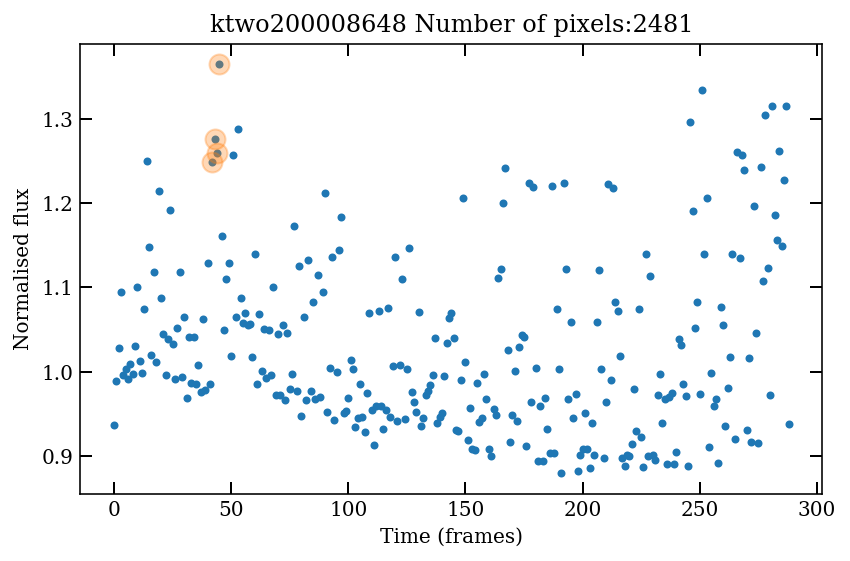

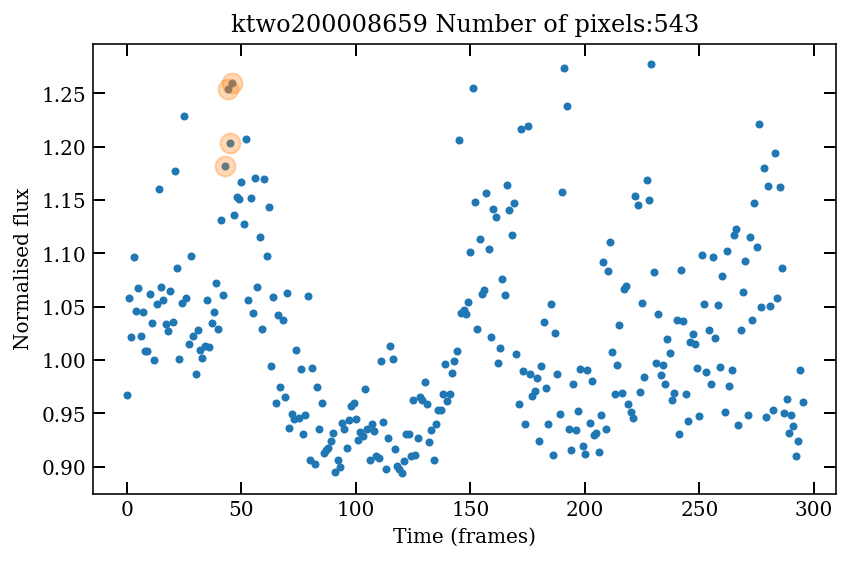

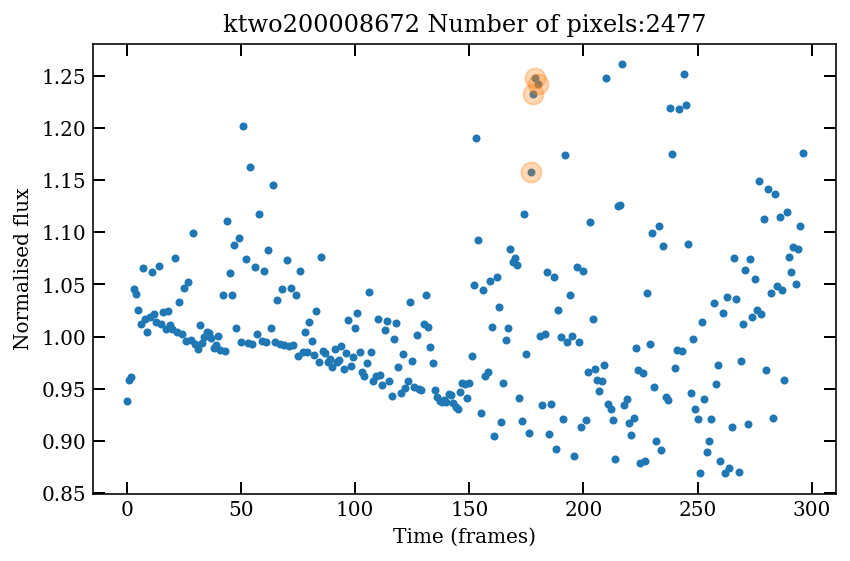

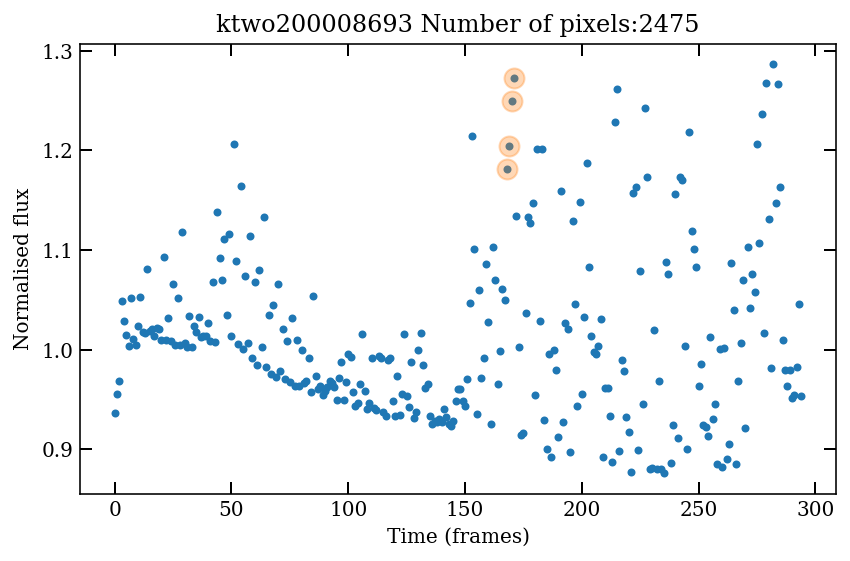

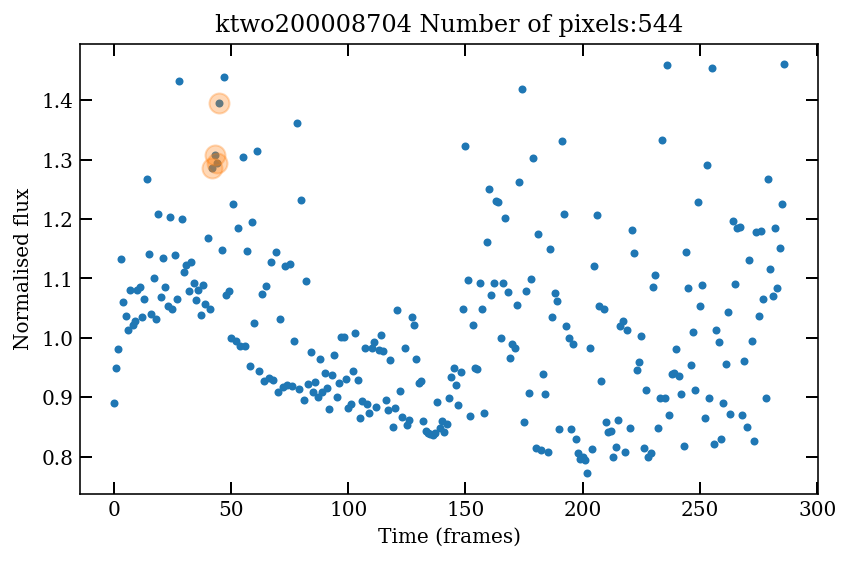

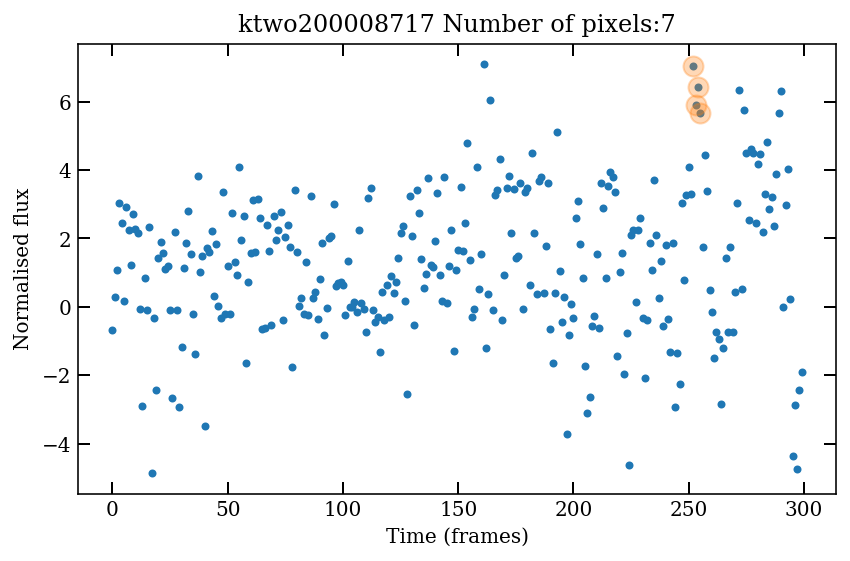

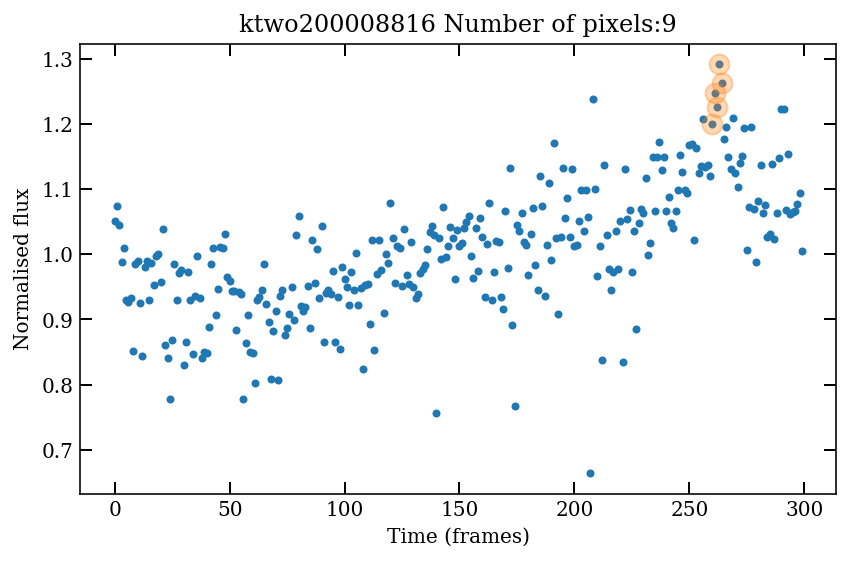

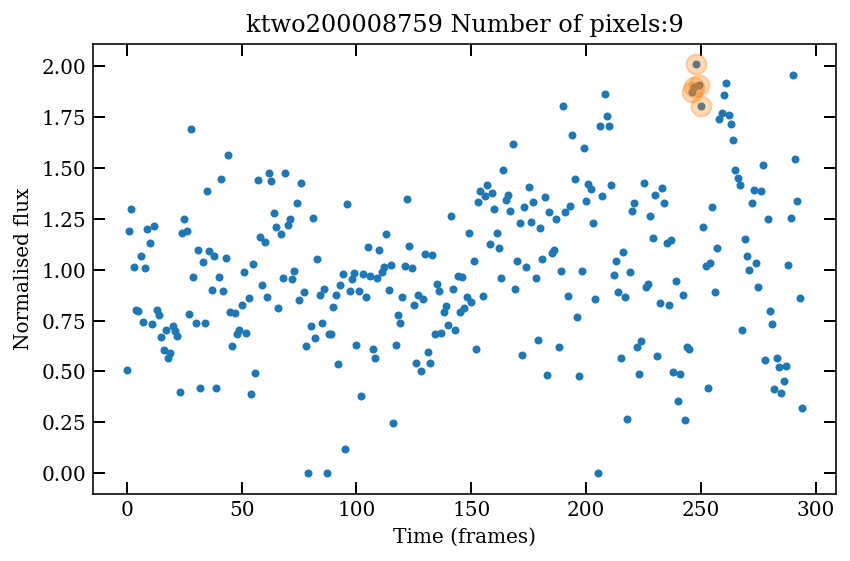

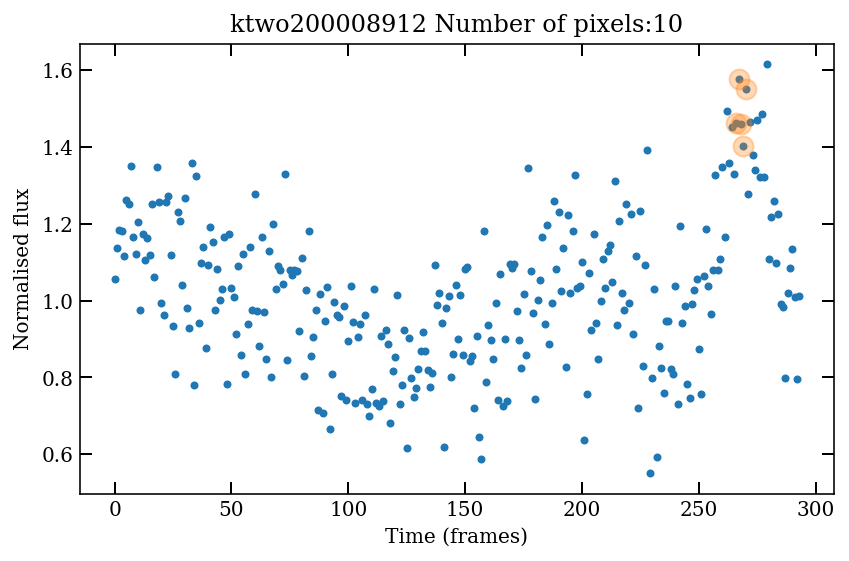

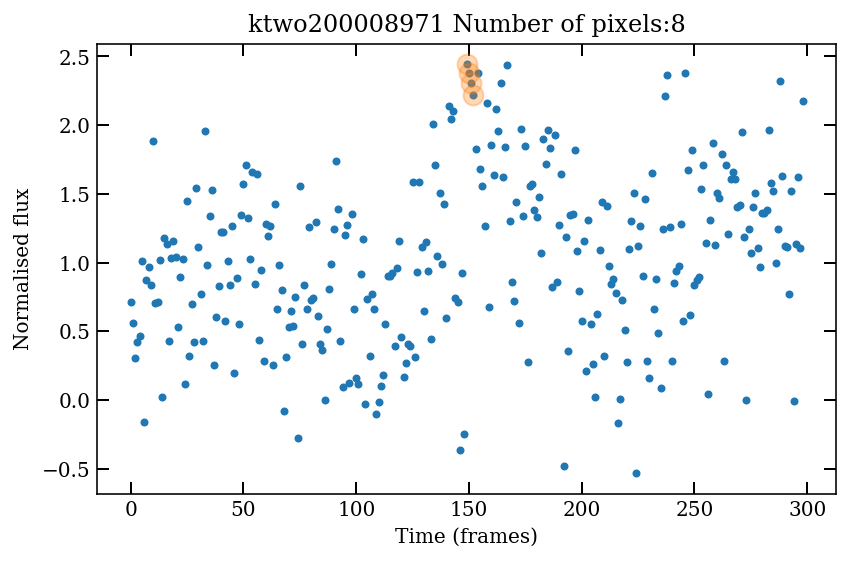

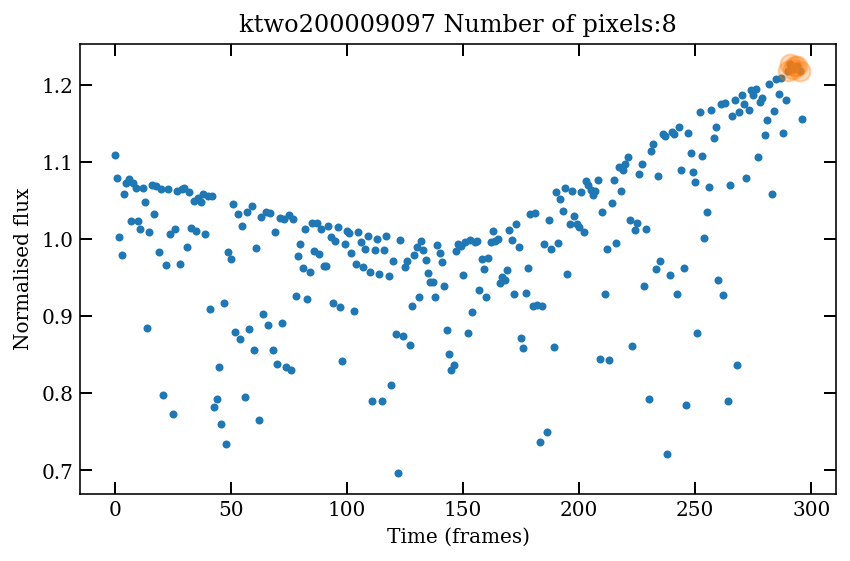

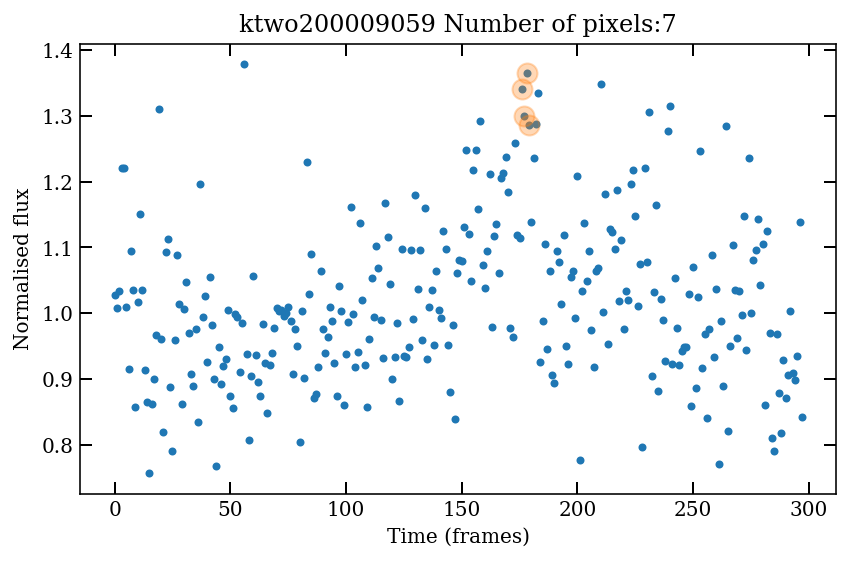

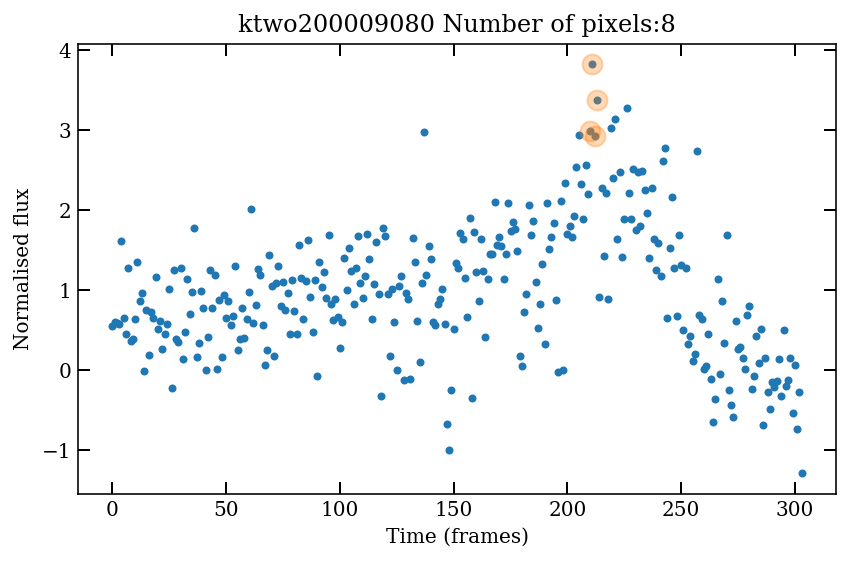

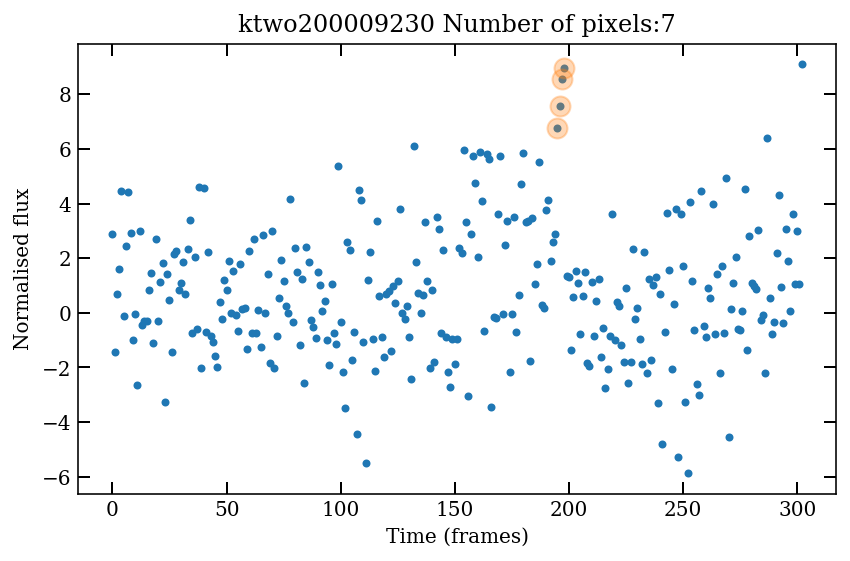

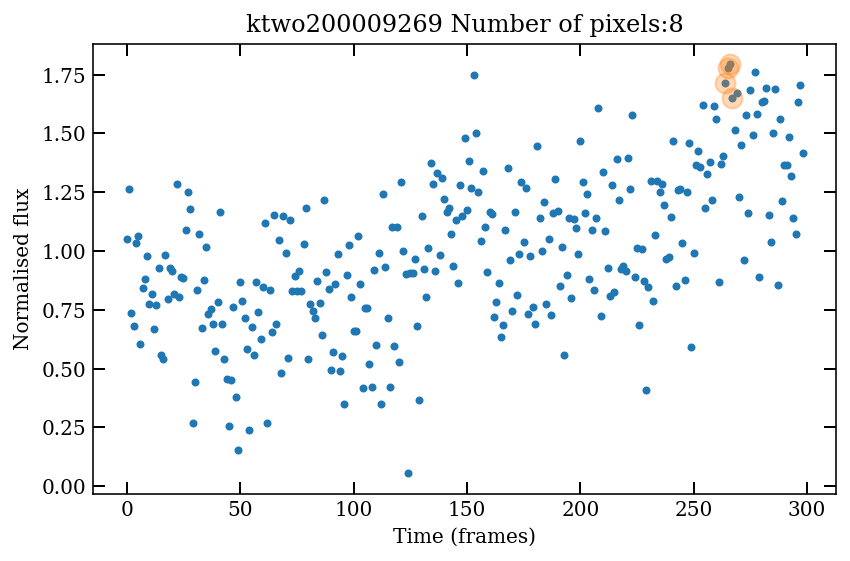

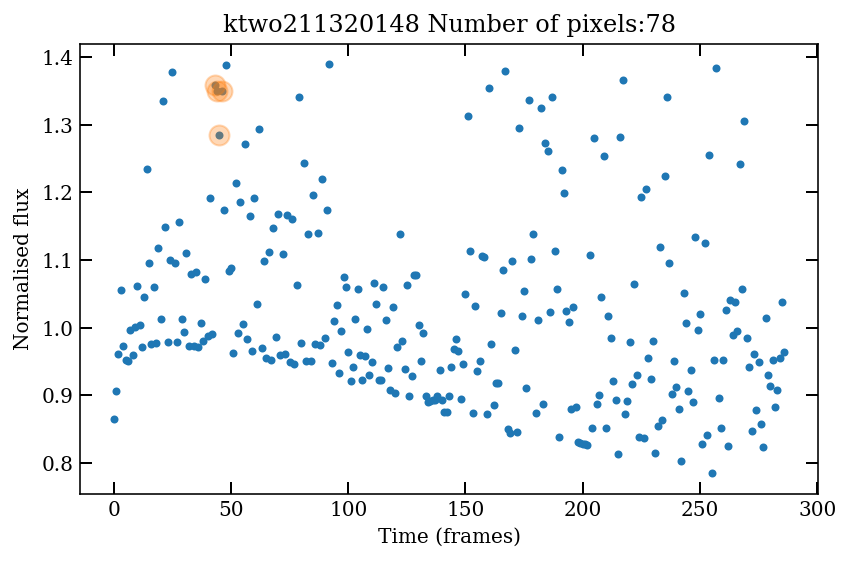

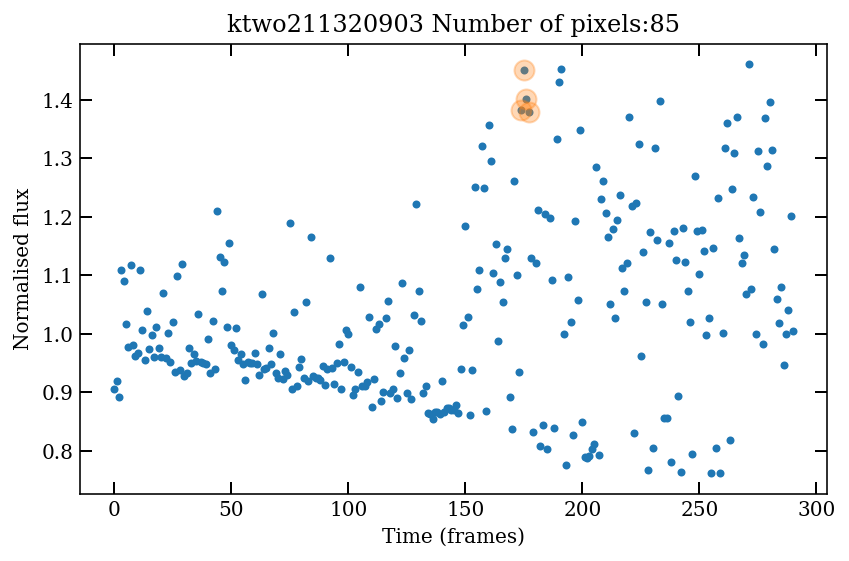

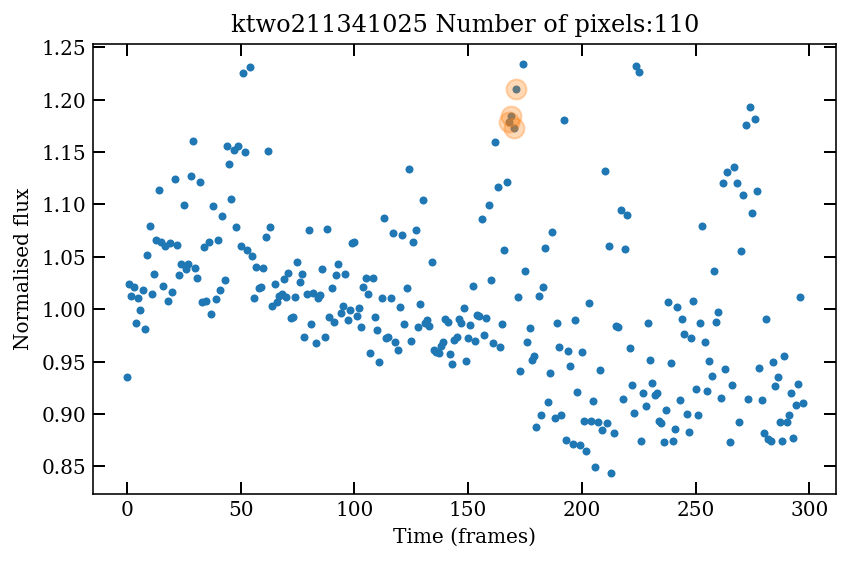

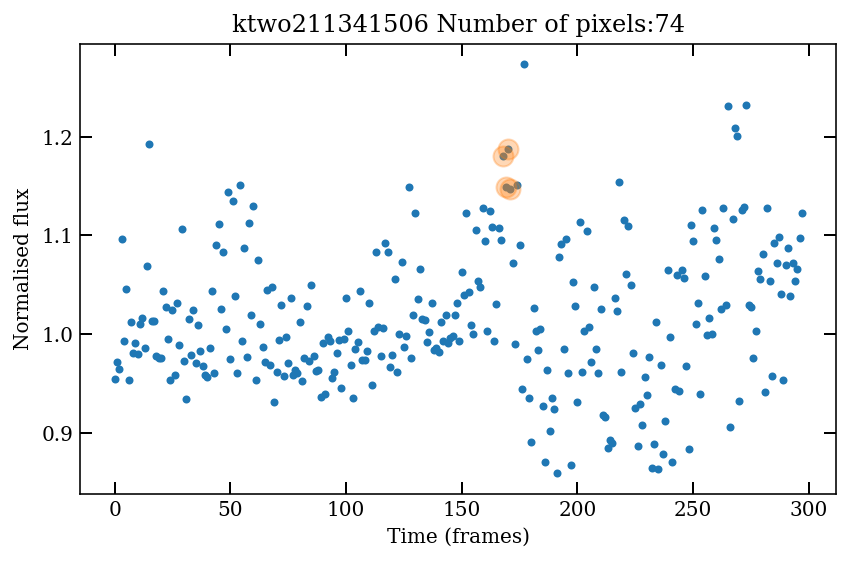

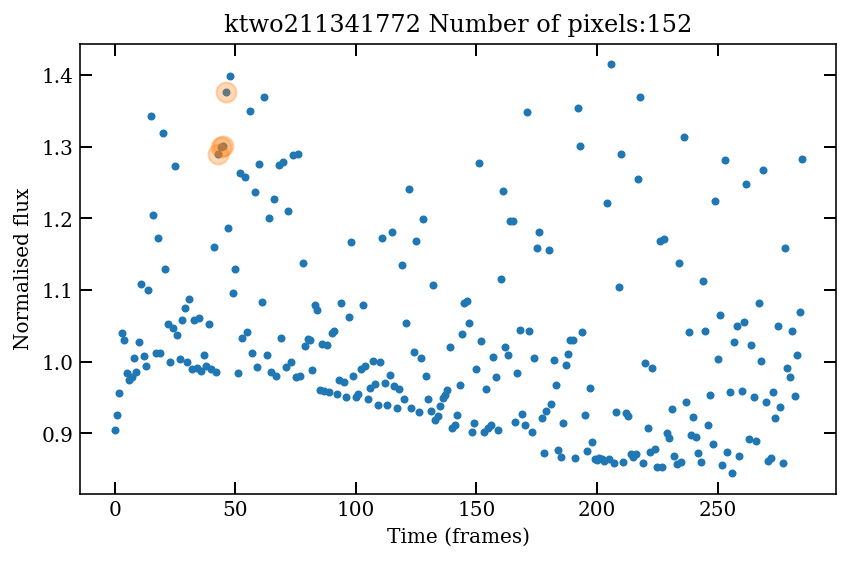

In [ ]:
path = '/Volumes/TOSHIBA EXt/K2/c5/*/*/'
save = '/Users/ryanr/Documents/PhD/coding/Kepler/K2/c5/'

for filename in glob(path+'*.gz'):
    K2tran(filename,save)

In [ ]:
path = '/Volumes/TOSHIBA EXt/K2/c5/'
save = '/Users/ryanr/Documents/PhD/coding/Kepler/K2/c5/'

configfiles = [os.path.join(path, f)
for dirpath, dirnames, files in os.walk(path)
for f in fnmatch.filter(files, '*.gz')]


In [ ]:
configfiles

In [ ]:
for i in range(len(configfiles)):
    K2tran(configfiles[i],save)

In [ ]:
test = pyke.KeplerTargetPixelFile('/Users/ryanr/Documents/PhD/coding/Kepler/K2/06/ktwo200045342-c06_lpd-targ.fits.gz')

In [ ]:
test.aperture_mask

In [ ]:
test.path

In [ ]:
test.estimate_background()

In [ ]:
thing=test.to_lightcurve()

In [ ]:
plt.plot(thing.time,thing.flux)

In [ ]:
from pyke import KeplerLightCurveFile
from pyke.utils import KeplerQualityFlags


In [ ]:
pyke.kepextract('/Users/ryanr/Documents/PhD/coding/Kepler/K2/06/ktwo212535880-c06_lpd-targ.fits.gz', overwrite = True, bitmask=0)

In [ ]:

lc = KeplerLightCurveFile('/Users/ryanr/Documents/PhD/coding/Kepler/K2/06/ktwo212535880-c06_lpd-targ-kepextract.fits',quality_bitmask=KeplerQualityFlags.QUALITY_ZERO_BITMASK)

In [ ]:
cotrendlc = lc.compute_cotrended_lightcurve(cbvs= [1])

In [ ]:
plt.plot(cotrendlc.time,cotrendlc.flux,'.')
plt.plot(lc.time,lc.SAP_FLUX.flux,'.',alpha=0.1)

## Version two: include CBVs

In [ ]:
def K2tran(pixelfile,save):
    pyke.kepextract('pixelfile', overwrite = True, bitmask=0)
    LC = pyke.KeplerLightCurveFile(pixelfile.split('.fits')[0]+'-kepextract.fits')
    cotrend_LC = LC.compute_cotrended_lightcurve().SAP_FLUX
    time = LC.compute_cotrended_lightcurve().time
    data
    n_steps = 12
    std_vec = np.zeros(n_steps)
    for i in range(n_steps):
        std_vec[i] = np.nanstd(datacube[i:-n_steps+i:n_steps,:,:] - datacube[i+n_steps*80,:,:])
    Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
    #print(Framemin)
    lc = LC/np.nanmedian(LC)
    slc = LC[Framemin::n_steps]/np.nanmedian(LC[Framemin::n_steps])
    stime = time[Framemin::n_steps]
    
    med = np.nanmedian(lc)
    std = np.nanstd(lc)

    cutlc = [x for x in lc if (x >med-2*std and x<med+2*std)] #np.take(np.where(lc>med-2*sd and  lc<med+2*sd))) 
    #cuttime = np.take(time,np.where(lc==cutlc))
    #scuttime = cuttime[Framemin::n_steps]
    scutlc = cutlc[Framemin::n_steps]
    excess = cutlc[Framemin::n_steps]>(np.nanmedian(cutlc)+2*np.nanstd(cutlc))
    if len(excess)>0:
        i = 0
        line = 0
        Index=[]
        while line < 3 and i<len(excess):
            Index = []
            while (excess[i] == True and i+1<len(excess)):
                line = line +1
                Index.append(i)
                i=i+1
            i=i+1
        print(Index)
        if len(Index)<3:
            Index = []
        if len(Index)>0:
            plt.figure()
            plt.plot(scutlc,'.')
            plt.plot(Index,np.array(scutlc)[Index],'o',alpha=0.3, markersize = 10)
            plt.title(pixelfile.split('/')[-1].split('-')[0])
            plt.xlabel('Time (frames)')
            plt.ylabel('Normalised flux')
            plt.savefig(save+pixelfile.split('/')[-1].split('-')[0]+'.png');
    else:
        excess=0
        Index=[]
    return lc, time, excess, Index, Framemin  

In [ ]:
pyke.kepextract('/Users/ryanr/Documents/PhD/coding/Kepler/K2/06/ktwo212535880-c06_lpd-targ.fits.gz', overwrite = True, bitmask=0)


In [ ]:
LC = pyke.KeplerLightCurveFile('/Users/ryanr/Documents/PhD/coding/Kepler/K2/06/ktwo212535880-c06_lpd-targ-kepextract.fits')

In [ ]:
thing = LC.SAP_FLUX

In [ ]:
plt.plot(LC.SAP_FLUX.time,LC.SAP_FLUX.flux)

In [ ]:
thing.flux.shape

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


[52, 53, 54]


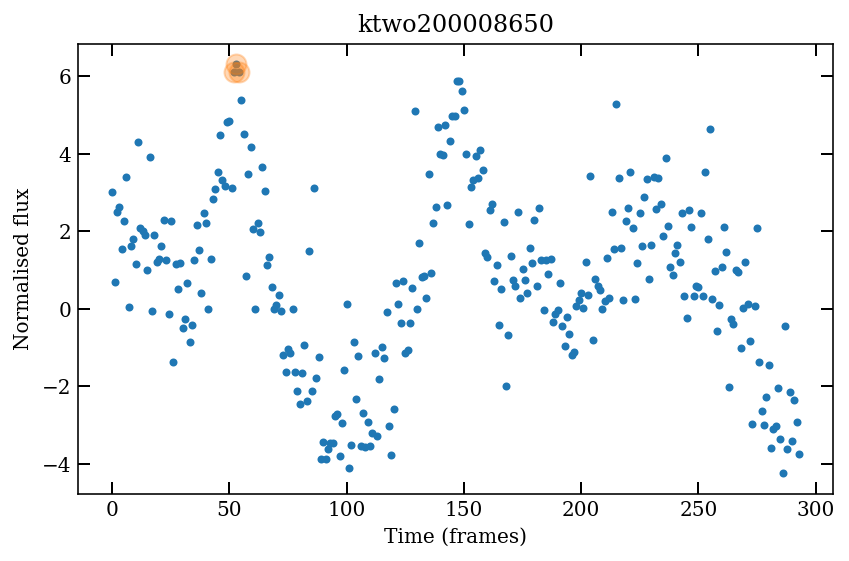

In [57]:
pixelfile = '/Volumes/TOSHIBA EXT/K2/c5/200000000/08000/ktwo200008650-c05_lpd-targ.fits.gz'
save = '/Users/ryanr/Documents/PhD/coding/Kepler/K2/c5/'

hdu = fits.open(pixelfile)
dat = hdu[1].data
datacube = dat["FLUX"]
time = dat["TIME"]


n_steps = 12
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(datacube[i:-n_steps+i:n_steps,:,:] - datacube[i+n_steps*80,:,:])
Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
# Make a mask of the target object, using the reference frame 
Mask = datacube[Framemin,:,:]/np.nanstd(datacube[Framemin,:,:])
Mask[Mask>2] = np.nan
Mask[Mask<2] = 1

LC = np.nansum(datacube*Mask, axis=(1,2))

lc = LC/np.nanmedian(LC)
slc = LC[Framemin::n_steps]/np.nanmedian(LC[Framemin::n_steps])
stime = time[Framemin::n_steps]

med = np.nanmedian(lc)
std = np.nanstd(lc)

cutlc = [x for x in lc if (x >med-2*std and x<med+2*std)] #Cutting out wrong points

scutlc = cutlc[Framemin::n_steps]
excess = cutlc[Framemin::n_steps]>(np.nanmedian(cutlc)+2*np.nanstd(cutlc))
if len(excess)>0:
    i = 0
    line = 0
    Index=[]
    while line < 3 and i<len(excess):
        Index = []
        while (excess[i] == True and i+1<len(excess)):
            line = line +1
            Index.append(i)
            i=i+1
        i=i+1
    print(Index)
    if len(Index)<3:
        Index = []
    if len(Index)>0:
        plt.figure()
        plt.plot(scutlc,'.')
        plt.plot(Index,np.array(scutlc)[Index],'o',alpha=0.3, markersize = 10)
        plt.title(pixelfile.split('/')[-1].split('-')[0])
        plt.xlabel('Time (frames)')
        plt.ylabel('Normalised flux')
        plt.tight_layout()
        plt.savefig(save+pixelfile.split('/')[-1].split('-')[0]+'.pdf');
else:
    excess=0
    Index=[] 

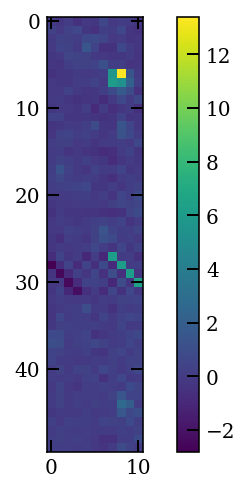

In [59]:
plt.imshow(datacube[Framemin,:,:]/np.nanstd(datacube[Framemin,:,:]))
plt.colorbar()

In [14]:
np.nanmedian(datacube[Framemin,:,:])

13.223324

In [16]:
np.nanstd(datacube[Framemin,:,:])

256.12729

In [60]:

testmask = datacube[Framemin,:,:]/np.nanstd(datacube[Framemin,:,:])
testmask[testmask>2] = np.nan
testmask[testmask<2] = 1

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


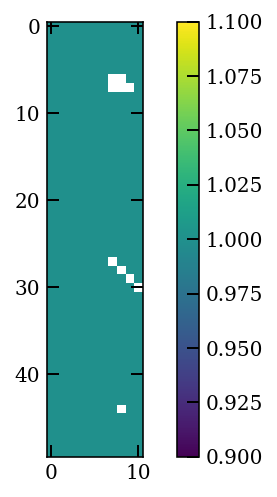

In [61]:
plt.imshow(testmask)
plt.colorbar()

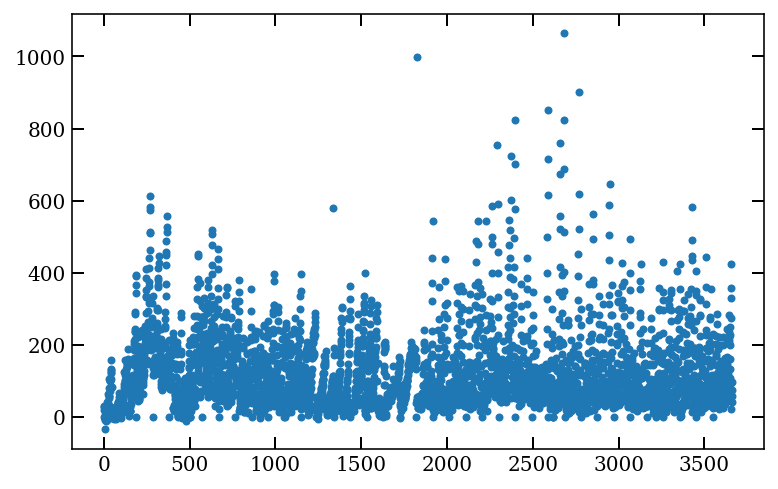

In [50]:
plt.plot(np.nansum(datacube*~testmask-datacube[Framemin]*testmask, axis=(1,2)),'.')
#plt.ylim(0.9,1.1)

In [43]:
np.count_nonzero(~np.isnan(testmask))

32

In [44]:
testmask.shape

(5, 7)

In [80]:
def plttpf(f):
    plt.imshow(datacube[f,:,:]*testmask/np.nanstd(datacube[Framemin,:,:]*testmask))
    plt.colorbar()
    plt.show()

In [81]:
interact(plttpf, f=(0,datacube.shape[0],1));

interactive(children=(IntSlider(value=1831, description='f', max=3663), Output()), _dom_classes=('widget-interact',))

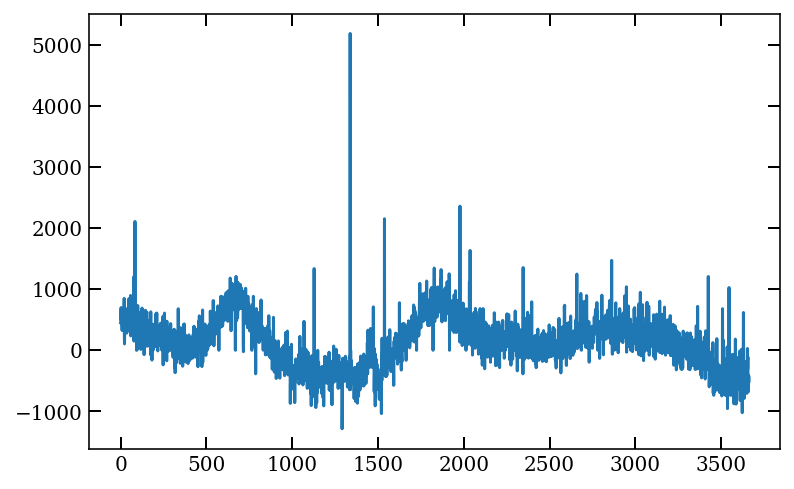

In [75]:
plt.plot(np.nansum(datacube*testmask,axis=(1,2)))

In [76]:
framesub = np.zeros(datacube.shape)

In [84]:
for i in range(datacube.shape[0]):
    framesub[i] = datacube[i,:,:]*testmask/np.nanmean(datacube[i,:,:]*testmask)


/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [85]:
def plttpf(f):
    plt.imshow(framesub[f,:,:]/np.nanstd(framesub[Framemin,:,:]))
    plt.colorbar()
    plt.show()

In [2]:
interact(plttpf, f=(0,datacube.shape[0],1));

NameError: name 'interact' is not defined

In [1]:
8+1

9

In [4]:
datacube

NameError: name 'datacube' is not defined